<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/LAB4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descenso por gradiente

Procesamiento Adaptativo de Señales Aleatorias

© 2019 Mestanza, Joaquín

© 2019 Fernandez, Lucero Guadalupe

In [0]:
from IPython.display import clear_output
from scipy.io.wavfile import read
import numpy as np
import scipy
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave, struct, math, random
from IPython.display import Audio
from scipy import signal as sgn
from scipy.linalg import toeplitz
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import ccf

In [0]:
!wget "https://raw.githubusercontent.com/LuFernandez/PASA/master/LAB4/data/Tamara_Laurel_-_Sweet_extract.wav"
clear_output()

In [0]:

def get_mono_array(stereo_file_name):
  file = read(stereo_file_name)
  fs = file[0]
  datos = np.array(file[1],dtype=float) 
  if len(np.shape(datos))>1: #si tiene dos canales
      ch0 = datos[:, 0]
      ch1 = datos[:, 1]
      datos = (ch0 + ch1)/2  # o lo hacemos mono
  return fs, datos
  
def get_signal(path):
  file_name = path
  fs, signal = get_mono_array(file_name)
  signal =  signal/np.linalg.norm(signal)   #normalizo
  return signal


In [0]:
#codigo de ejemplo otorgado por la cátedra
def cost_function(w1, w2, sigma2u):
  w = [w1, w2]
  
  J = sigma2u
  J -= np.dot(np.transpose(w), p)
  J -= np.dot(np.transpose(p), w)
  J += np.dot(np.transpose(w), np.dot(R, w))
  
  return J

In [0]:
"""Implementa el filtrado óptimo Wiener con descenso por gradiente.

Argumentos:
  R: matriz de autocorrelación
  p: matriz de correlación cruzada
  w0: valor inicial de los coeficientes del filtro
  mu: tamaño de paso
  N: número máximo de iteraciones

Devuelve:
  Una matriz de tipo np.array en cuyas filas están
  los coeficientes w para cada paso.
"""
def steepest_descent(R, p, w0, mu, N):
  J = np.zeros(N)

  Wt[0, :] = w0
  
  for n in range(1, N):
    Wt[n, :] = Wt[n - 1, :] + mu * (p - np.dot(R, Wt[n - 1, :]))
    
  # return Wt
  return Wt

In [0]:
def calc_optimum_filter(R, p, sigma2d):
  '''
  Calcula el filtro Wiener óptimo
  
  sigma2: energía de la señal de entrada
  R: matriz de autocorrelación
  p: vector de correlación cruzada
  '''
  
  wo = np.dot(np.linalg.inv(R), p)
  Jmin = sigma2d - p.dot(wo)
  return wo, Jmin

Probamos la función con los argumentos sugeridos y ploteamos los coeficientes en el tiempo.

In [0]:
R = np.array([[2, 1], [1,2]])
p = np.array([6, 4])
mu = 0.1
N = 1000
w0 = [0, 0]
sigma2u = 20

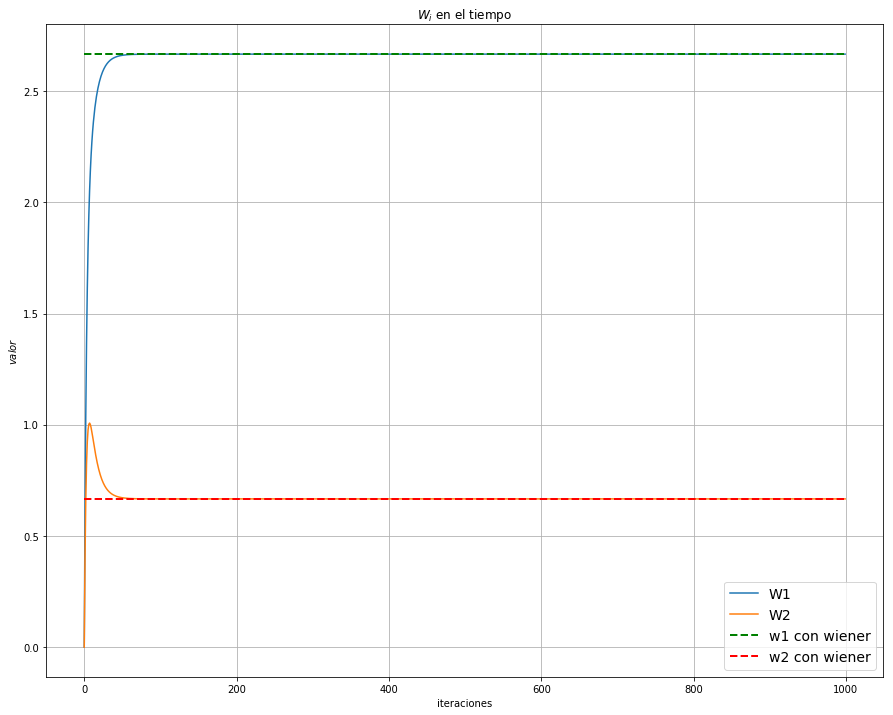

In [202]:
#filtro óptimo Wiener
w0_wiener, Jmin_wiener = calc_optimum_filter(R, p, sigma2u)


#steepest descent
Wt = np.zeros((N, len(w0)))
Wt = steepest_descent(R, p, w0, mu, N)


#ploteamos ambas para compararlas
plt.figure(figsize=(15, 12))
plt.plot(Wt[:,0])
plt.plot(Wt[:,1])
plt.plot([0, len(Wt) - 1], [w0_wiener[0], w0_wiener[0]], color='g', linestyle='--', linewidth=2)
plt.plot([0, len(Wt) - 1], [w0_wiener[1], w0_wiener[1]], color='r', linestyle='--', linewidth=2)

plt.legend(['W1', 'W2', 'w1 con wiener', 'w2 con wiener'], fontsize=14)
plt.title('$W_i$ en el tiempo')
plt.xlabel('iteraciones')
plt.ylabel('$valor$')
plt.grid()
plt.show()

Ploteamos la curva de error $J(n)$

In [0]:
def calc_j(R, p, w0, mu, N, sigma2u):
  J = np.zeros(N)

  Wt[0, :] = w0
  J[0] = cost_function(Wt[0, 0], Wt[0, 1], sigma2u)
  
  for n in range(1, N):
    Wt[n, :] = Wt[n - 1, :] + mu * (p - np.dot(R, Wt[n - 1, :]))
    J[n] = cost_function(Wt[n, 0], Wt[n, 1], sigma2u)
  
  Jmin = sigma2u - np.dot(np.transpose(p), np.dot(R, p))
    
  # return Wt
  return J, Jmin

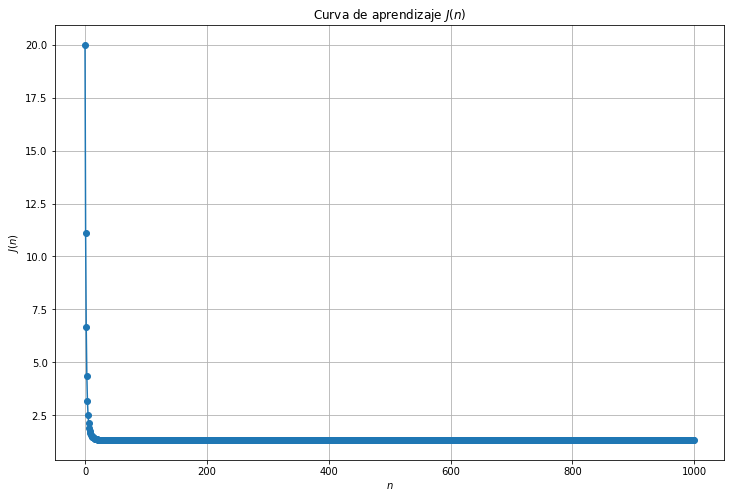

In [205]:
  J, Jmin = calc_j(R, p, w0, mu, N, sigma2u)
  plt.figure(figsize=(12, 8))
  plt.plot(J, marker='o', label='J(n)')
  plt.xlabel('$n$')
  plt.ylabel('$J(n)$')
  plt.title('Curva de aprendizaje $J(n)$')
  plt.grid()
  plt.show()

Calculamos autovalores de $R$

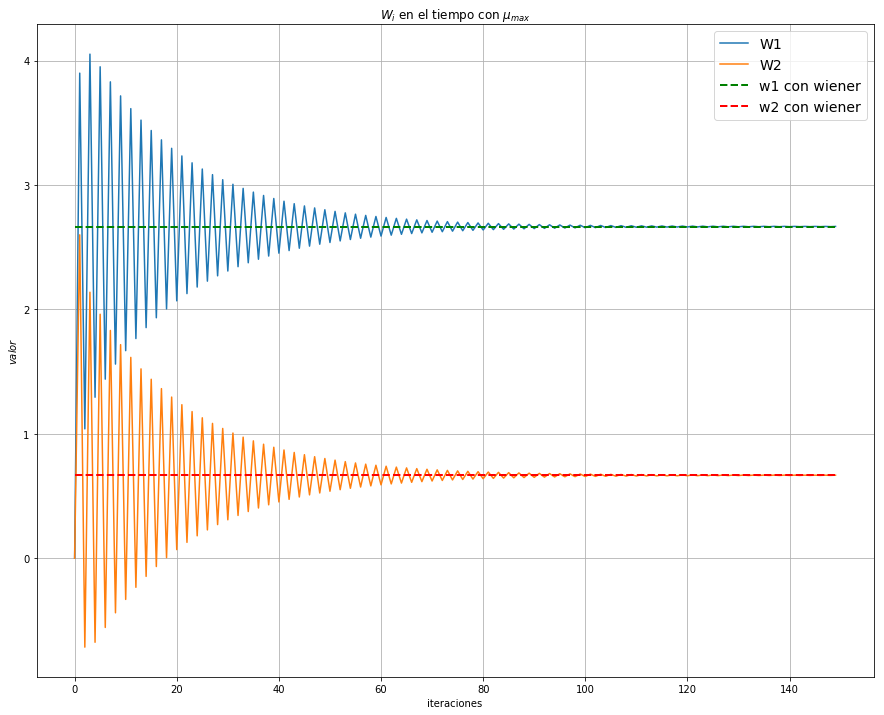

In [208]:
ava, ave = np.linalg.eig(R) #ava=autovalores; ave=autovectores
mu_max= 2/np.max(ava)

#tomamos mu_max=0.65 y ploteamos w(t)
N=150
mu_max=0.65
Wt = np.zeros((N, len(w0)))
Wt = steepest_descent(R, p, w0, mu_max, N)

plt.figure(figsize=(15, 12))
plt.plot(Wt[:,0])
plt.plot(Wt[:,1])
plt.plot([0, len(Wt) - 1], [w0_wiener[0], w0_wiener[0]], color='g', linestyle='--', linewidth=2)
plt.plot([0, len(Wt) - 1], [w0_wiener[1], w0_wiener[1]], color='r', linestyle='--', linewidth=2)

plt.legend(['W1', 'W2', 'w1 con wiener', 'w2 con wiener'], fontsize=14)
plt.title('$W_i$ en el tiempo con $\mu_{max}$')
plt.xlabel('iteraciones')
plt.ylabel('$valor$')
plt.grid()
plt.show()


HASHTAG CONCLUSIONES EQUISDEEE
###CONCLUSOIONES

#ACA LAS CONCLUSIONES EQUSD

###steepest_descent_test.py

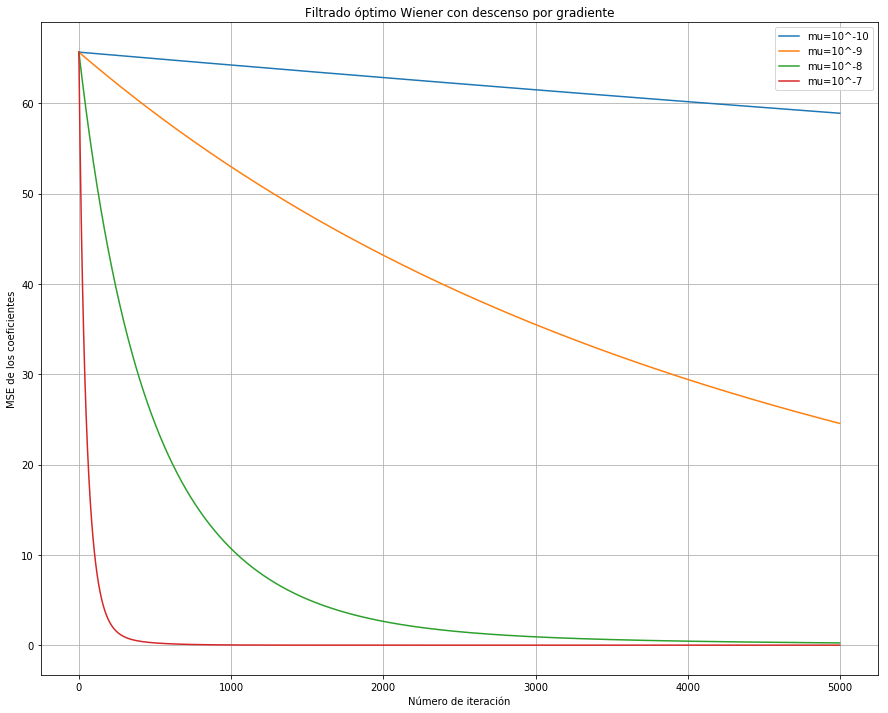

In [211]:
"""Prueba de filtrado óptimo Wiener con descenso por gradiente.

22.46 Procesamiento adaptativo de Señales Aleatorias
"""


import math
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.linalg import toeplitz
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Simula un canal
def simulate_channel(y, snr_db):
    w = [1.0000, 2.4156, 2.2226, 0.9578, 0.1884, 0.0130];
    u = signal.filtfilt(1, w, y);

    # Añade ruido blanco
    Pmeas = np.var(y);
    snr = 10 ** (snr_db / 10);
    P_noise = Pmeas / snr;
    additive_white_noise = math.sqrt(P_noise) * np.random.randn(*u.shape);

    # Simula cuantización
    u = np.round(u + additive_white_noise);

    return (u, w)

# Lee archivo de entrada
fs, d = wavfile.read('Tamara_Laurel_-_Sweet_extract.wav')
d = np.float32(d)

# Simula un canal
u, w_true = simulate_channel(d, 80);

# Extrae segmentos de un segundo de ambas señales
s_start = 8;
d = d[s_start * fs:(s_start + 1) * fs];
u = u[s_start * fs:(s_start + 1) * fs];

# Estima la autocorrelación y correlación cruzada
N_THETA = 6;
r = np.correlate(u, u, 'full') / len(u);
r = r[(len(u) - 1):len(u) - 1 + N_THETA];
R = toeplitz(r);

p = np.correlate(d, u, 'full') / len(u);
p = p[(len(u) - 1):len(u) - 1 + N_THETA];

# Determina el filtro óptimo Wiener
w_wiener = inv(R).dot(p);

# Encuentra el filtro óptimo Wiener con descenso por gradiente
mus = [1e-10, 1e-9, 1e-8, 1e-7]; # Diferentes tamaños de paso
w0 = np.zeros(N_THETA);
Wt = np.zeros((N, len(w0)))

plt.figure(figsize=(15, 12))
for mu in mus:
    N = 5000; # Número de iteraciones

    # Llama a la función de filtrado óptimo Wiener con descenso por gradiente.
    # Las filas de Wt representan los filtros en diferentes instantes.
    Wt = steepest_descent_test(R, p, w0, mu, N);

    # Calcula instante a instante el error cuadrático medio de los
    # coeficientes del filtro respecto de los coeficientes del filtro óptimo.
    mse_coeffs = np.mean((Wt - w_wiener) ** 2, 1)
    plt.plot(mse_coeffs, label='mu=10^%i' % math.log10(mu))

# Representación

plt.xlabel('Número de iteración')
plt.ylabel('MSE de los coeficientes')
plt.title('Filtrado óptimo Wiener con descenso por gradiente')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
